In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

## Load the metrics obtained from sleep_staging_analysis.py

In [2]:
all_metrics = pd.read_csv("all_metrics.csv")
avg_metrics = pd.read_csv("avg_metrics.csv")

## Get the average confusion matric over the 50 subjects

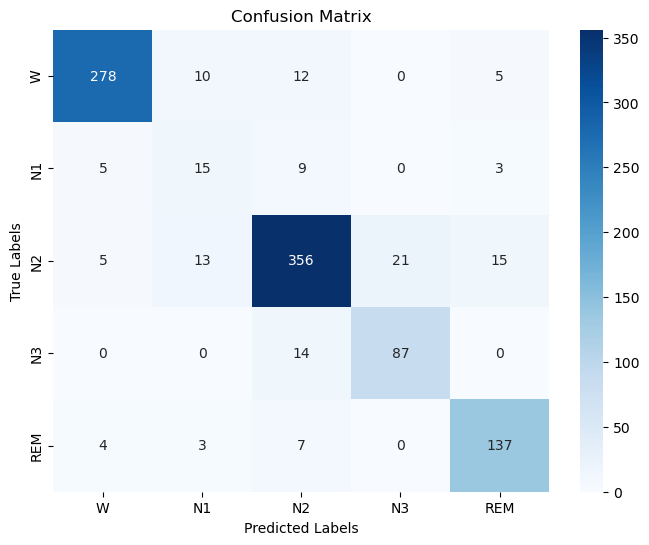

In [3]:
# Reobtained correct 
confusion_matrix_str = avg_metrics["avg_cm"][0]
integers = re.findall(r'-?\d+', confusion_matrix_str)
integers = [int(i) for i in integers]
confusion_matrix = np.array(integers).reshape(5, 5)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['W', 'N1', 'N2', 'N3', 'REM'], yticklabels=['W', 'N1', 'N2', 'N3', 'REM'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix highlights a strong agreement between expert-labeled sleep stages in the SHHS dataset and the YASA model’s predictions. The only challenge lies with the N1 stage, which is known for being ambiguous, as it marks the transition between wakefulness and light sleep.

# Analysis of other performance metrics 

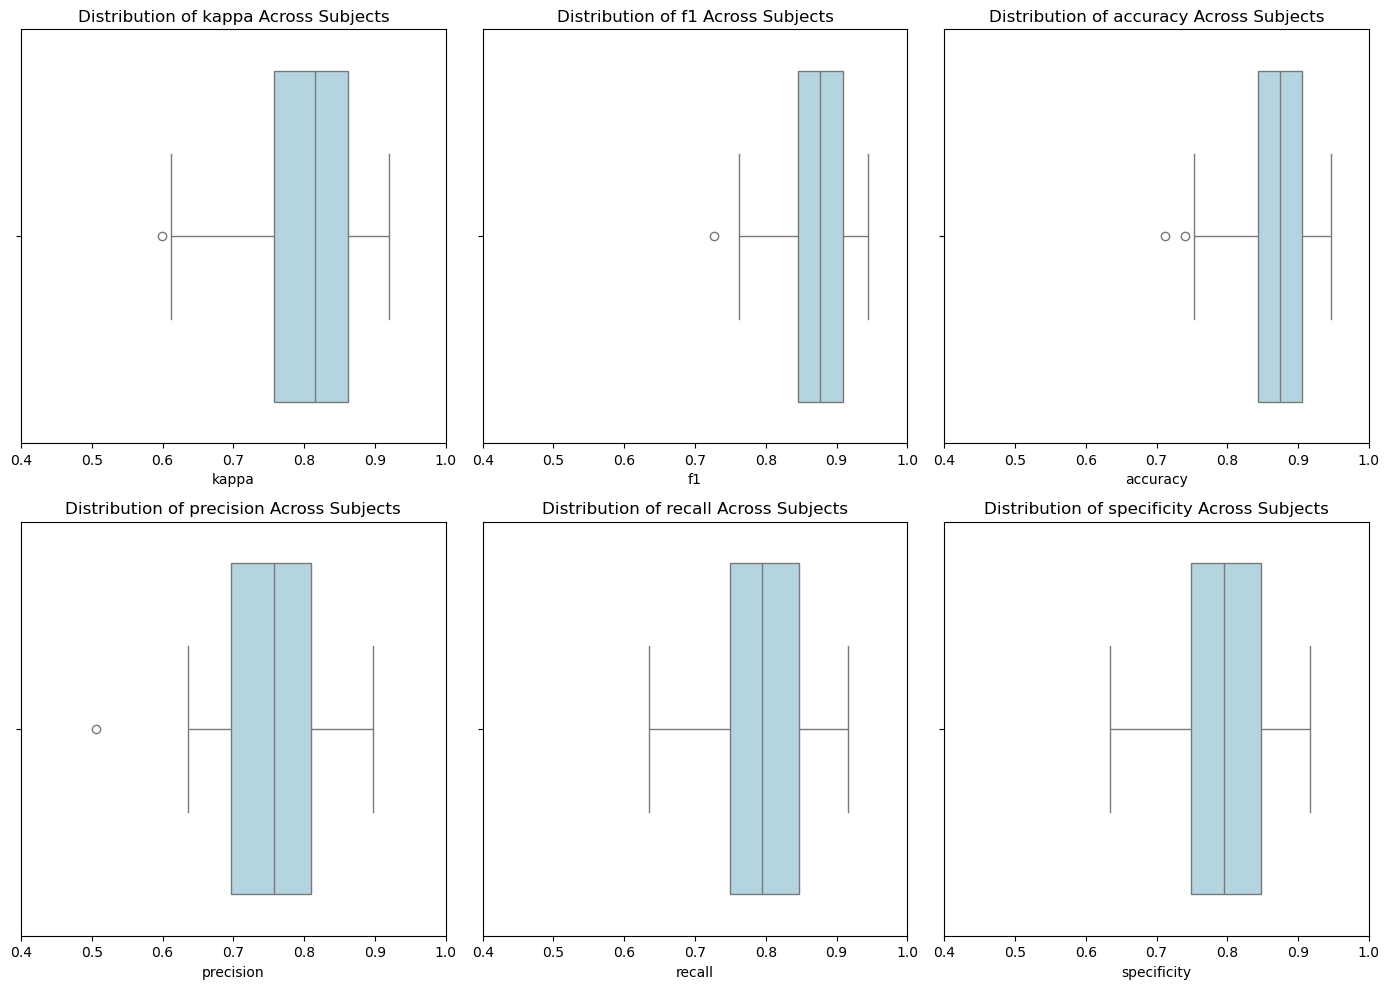

In [4]:
# List of metrics to visualize
metrics_to_plot = ['kappa', 'f1', 'accuracy', 'precision', 'recall', 'specificity']

# Create subplots for each metric
plt.figure(figsize=(14, 10))

for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.boxplot(data=all_metrics, x=metric, color='lightblue')
    plt.title(f'Distribution of {metric} Across Subjects')
    plt.xlim([0.4, 1])

plt.tight_layout()
plt.show()

### Interpretation of Results:

The performance of the YASA model in predicting sleep stages shows strong overall results:

- **Kappa** (0.81): Indicates a high level of agreement between the predicted and actual stages, with minor inconsistencies.
- **F1 Score** (0.87): Reflects a balanced precision and recall, showing that the model is good at both identifying correct stages and minimizing false positives/negatives.
- **Accuracy** (0.87): Shows that the model is highly accurate in classifying the correct sleep stages.
- **Precision** (0.75): While good, the model can still improve in minimizing false positives in certain stages.
- **Recall** (0.80): Indicates a decent ability to correctly identify sleep stages, with room for improvement.
- **Specificity** (0.80): Shows that the model performs well in identifying non-sleep stages.

The **standard deviations** indicate relatively stable performance across subjects, with **kappa** and **precision** showing the most variation.

Overall, these results suggest that the YASA model provides reliable predictions of sleep stages with room for improvement in distinguishing between certain stages.